# Lab 6.03 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [11]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [12]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [13]:
for i in cols_with_dollars:
  movies[i] = (
    movies[i]
    .astype(str)                            # zorg dat het strings zijn
    .str.replace(r'[\$,]', '', regex=True)  # verwijder $ en komma's
    .str.replace(' ', '', regex=False)      # verwijder ook spaties
    .str.replace('.', '', regex=False)      # verwijder ook punten (duizendtallen)
    .astype(float)                          # zet om naar float
    / 1000000                               # delen door miljoen
  )

movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

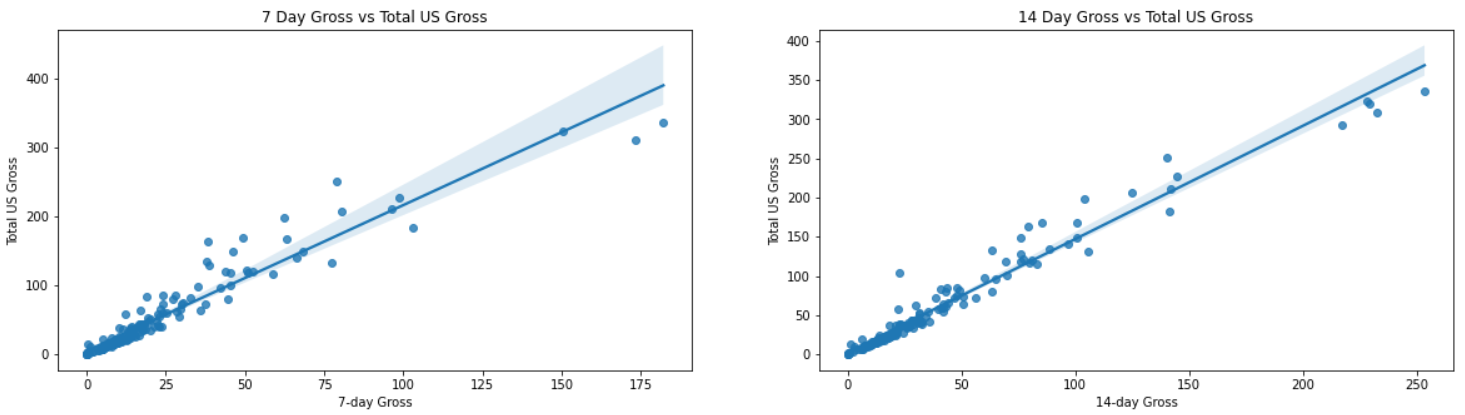

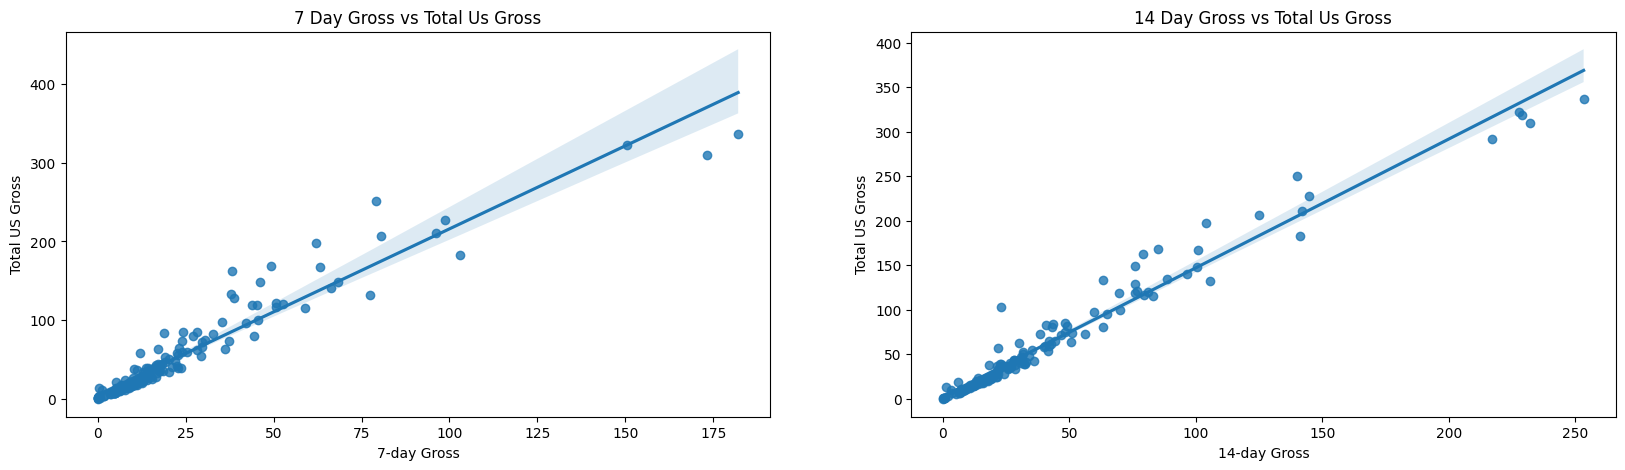

In [15]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.regplot(ax = axs[0], x=movies['7-day Gross'], y=movies['Total US Gross']);
axs[0].set_title("7 Day Gross vs Total Us Gross")

sns.regplot(ax = axs[1], x=movies['14-day Gross'], y=movies['Total US Gross']);
axs[1].set_title("14 Day Gross vs Total Us Gross")

extra_7days = movies.dropna(subset=['7-day Gross'])
extra_14days = movies.dropna(subset=['14-day Gross'])

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [20]:
print('7 days vs total')
cor = np.corrcoef(
    extra_7days['7-day Gross'],
    extra_7days['Total US Gross'])[0][1]
print(f'R = {cor }')
print(f'R2 = {cor ** 2 }')
print(f'\n{50*"*"}\n')
print('14 days vs total')
cor = np.corrcoef(
    extra_14days['14-day Gross'],
    extra_14days['Total US Gross'])[0][1]
print(f'R = {cor }')
print(f'R2 = {cor ** 2 }')

# conclusie 7 dagen : 
# R > 0 => het is een stijgend verband
# R ~0.95 => het is een uitzonderlijk sterk verband

# R2 => 0.92 => het is een uitzonderlijk sterk verband
# 92% van de veriantie afh veranderlijke wordt verklaard door de onafhankelijke veranderlijke 

# conclusie 14 dagen: 
# R > 0 => het is een stijgend verband
# R ~0.98 => het is een uitzonderlijk sterk verband

# R2 => 0.96 => het is een uitzonderlijk sterk verband
# 96% van de veriantie afh veranderlijke wordt verklaard door de onafhankelijke veranderlijke 

7 days vs total
R = 0.9594075444143062
R2 = 0.920462836279089

**************************************************

14 days vs total
R = 0.9813238689021968
R2 = 0.9629965356771759


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [ ]:
x = extra_7days['7-day Gross']
y = extra_7days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7 Days gross: y = {a}x + {b}')

y = 2.113464756610182x + 4.590921233818133


In [23]:
x = extra_14days['14-day Gross']
y = extra_14days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14 Days gross: y = {a}x + {b}')

14 Days gross: y = 1.4464530702590805x + 2.449002892551064


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

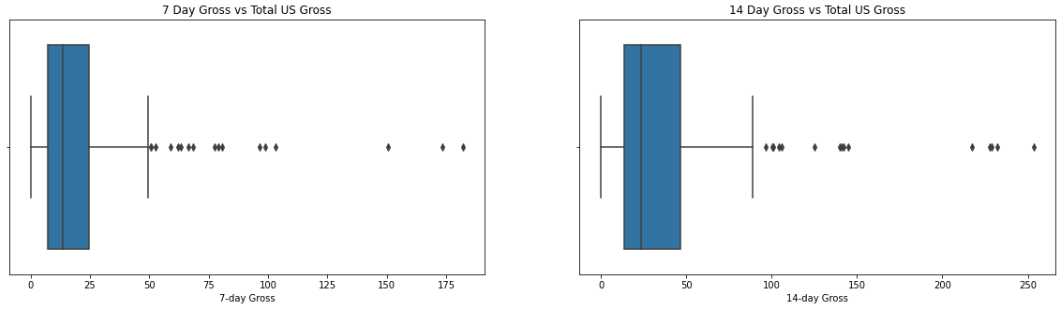

Text(0.5, 1.0, '14 Day Gross vs Total Us Gross')

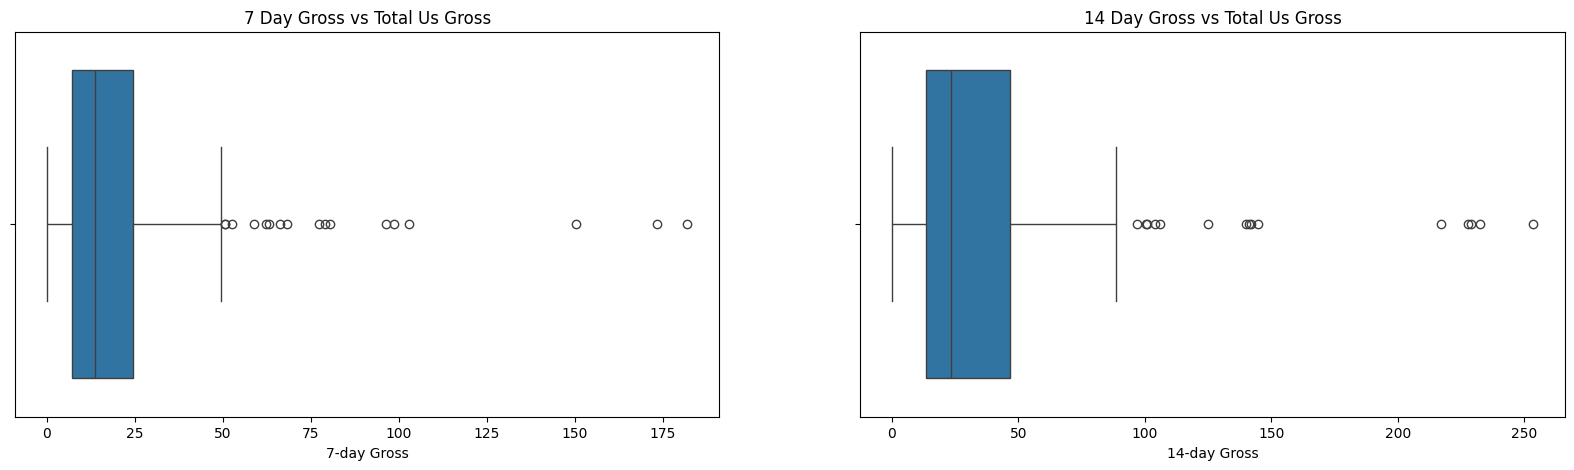

In [24]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(ax = axs[0], x=movies['7-day Gross']);
axs[0].set_title("7 Day Gross vs Total Us Gross")

sns.boxplot(ax = axs[1], x=movies['14-day Gross']);
axs[1].set_title("14 Day Gross vs Total Us Gross")


* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [30]:
# LOWER LIMIT Q1−1.5×IQR
# UPPER LIMIT : Q3+1.5×IQR

q1 = extra_7days['7-day Gross'].quantile(0.25)
q3 = extra_7days['7-day Gross'].quantile(0.75)
limit_7_days =  q3 + 1.5 * (q3 - q1)
print("limit_7_days_gross is %.8f"%limit_7_days)

q1 = extra_14days['14-day Gross'].quantile(0.25)
q3 = extra_14days['14-day Gross'].quantile(0.75)
limit_14_days =  q3 + 1.5 * (q3 - q1)
print("limit_14_days_gross is %.8f"%limit_14_days)


limit_7_days_gross is 50.37663788
limit_14_days_gross is 96.29067450


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

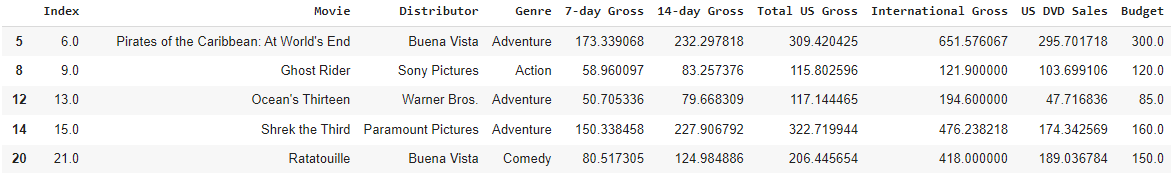

In [31]:
extra_14days[extra_14days['14-day Gross'] > limit_14_days]

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
37,38.0,The Transformers,Paramount Pictures,Action,NaN,228.950080,319.246193,389.026399,290.541120,151.0
60,61.0,Spider-Man 3,Sony Pictures,Adventure,182.070572,253.357629,336.530303,554.341323,123.997036,258.0
104,105.0,The Simpsons Movie,20th Century Fox,Comedy,102.949705,141.112342,183.135014,343.936008,96.337909,72.5
118,119.0,Night at the Museum,20th Century Fox,Comedy,79.055249,140.096754,250.863268,323.617573,153.286880,110.0


* 6.4 Remove the outliers out of the dataset.

In [32]:
extra_7days = extra_7days[extra_7days['7-day Gross'] < limit_7_days]
extra_14days = extra_14days[extra_14days['14-day Gross'] < limit_14_days]

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [33]:
cor = np.corrcoef(
    extra_7days['7-day Gross'],
    extra_7days['Total US Gross'])[0][1]
print(f'R = {cor : .4F}')
print(f'R2 = {cor ** 2 : .4F}')

R =  0.9325
R2 =  0.8695


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [35]:
x = extra_7days['7-day Gross']
y = extra_7days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7 Days gross: y = {a}x + {b}')

7 Days gross: y = 2.745680968813563x + -5.073945979380608


In [34]:
x = extra_14days['14-day Gross']
y = extra_14days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14 Days gross: y = {a}x + {b}')

14 Days gross: y = 1.6529869503645322x + -3.2273549510968853
